In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
from sentence_transformers import SentenceTransformer

In [35]:
df = pd.read_csv("data/combined_neuro_trials_with_interventions_20240313.csv")
df = df[['nct_id', 'Neurological Disease', 'Disease Class', 'brief_summary_description']].drop_duplicates()

In [36]:
df.shape

(57418, 4)

In [37]:
df.head()

,nct_id,Neurological Disease,Disease Class,brief_summary_description
0,NCT03890861,"Dementia, Alzheimer Type",Neurodegenerative Diseases,The RAATE proposal is designed to determine th...
6,NCT03060096,Depressive Symptoms,Psychiatry and Psychology Category,Mental health issues in post-treatment adult c...
12,NCT04525742,Muscular Dystrophies,Neuromuscular Diseases,Pandemic period could affect the disabled chil...
15,NCT02324634,Stroke,Central Nervous System Diseases,Stroke is the largest cause of adult disabilit...
18,NCT06036368,Essential Tremor,Central Nervous System Diseases,"This is a 6-week exploratory clinical study, d..."


In [10]:
len(set(df['Disease Class']))

26

In [15]:
# Calculate the number of words in each brief_summary_description
df['word_count'] = df['brief_summary_description'].apply(lambda x: len(x.split()))

# Adjusting the bins to include a category for more than 1000 words
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]
bin_labels = ['1-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700', '701-800', '801-900', '901-1000', '1001+']

# Plotting the distribution of word counts without specifying bins (each observation represented)
df['word_count_bin'] = pd.cut(df['word_count'], bins=bins, labels=bin_labels, right=False)


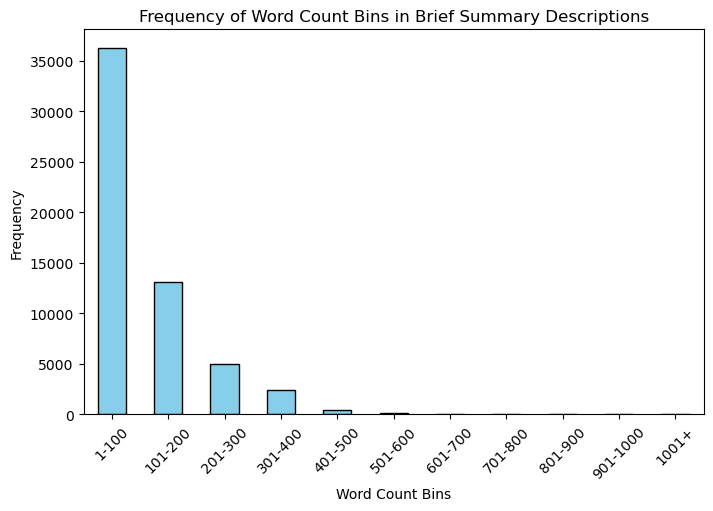

In [20]:
bin_counts = df['word_count_bin'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Word Count Bins in Brief Summary Descriptions')
plt.xlabel('Word Count Bins')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Sentence Transformer

https://towardsdatascience.com/topic-modeling-with-bert-779f7db187e6

https://github.com/ddangelov/Top2Vec

https://github.com/MaartenGr/BERTopic

In [27]:
dataset = sklearn.datasets.fetch_20newsgroups(
    subset="all", remove=("headers", "footers", "quotes")
)

In [30]:
long_enough = [len(t) > 200 for t in dataset["data"]]
targets = np.array(dataset.target)[long_enough]
news_data = [t.lower() for t in dataset["data"] if len(t) > 200]

In [39]:
len(news_data)

14949

In [32]:
news_data[0]

"\n\ni am sure some bashers of pens fans are pretty confused about the lack\nof any kind of posts about the recent pens massacre of the devils. actually,\ni am  bit puzzled too and a bit relieved. however, i am going to put an end\nto non-pittsburghers' relief with a bit of praise for the pens. man, they\nare killing those devils worse than i thought. jagr just showed you why\nhe is much better than his regular season stats. he is also a lot\nfo fun to watch in the playoffs. bowman should let jagr have a lot of\nfun in the next couple of games since the pens are going to beat the pulp out of jersey anyway. i was very disappointed not to see the islanders lose the final\nregular season game.          pens rule!!!\n\n"

In [21]:
model = SentenceTransformer("all-MiniLM-L6-v2")


In [33]:
# Creating the 'targets' array from the 'Disease Class' column
targets = df['Disease Class'].values

# Preparing the 'summary_data' list with lowercase transformations of the 'brief_summary_description' entries
summary_data = [t.lower() for t in df['brief_summary_description']]

In [34]:
len(targets), len(summary_data)

(57418, 57418)

In [40]:
# Generate embeddings for each brief summary description
bert_vectors = model.encode(summary_data, show_progress_bar=True)


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1795/1795 [02:24<00:00, 12.46it/s]


In [45]:
import umap.umap_ as umap


In [ ]:
# Apply UMAP to reduce the dimensionality of the embeddings
bert_mapper = umap.UMAP(metric="cosine", random_state=42).fit(bert_vectors)


/opt/anaconda3/envs/neurotrial-analysis/lib/python3.12/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
